## References

In [157]:
# https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html
# https://medium.com/square-corner-blog/topic-modeling-optimizing-for-human-interpretability-48a81f6ce0ed

## Prepare Notebook

In [1]:
# import packages
import logging
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora, models
from gensim.models import HdpModel, LsiModel, CoherenceModel

C:\Users\Sebastian Birk\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Training Corpora and Dictionaries

In [3]:
# load no pooling corpus
if (os.path.exists("tourism_no_pooling.dict")):
   dictionary_no_pooling = corpora.Dictionary.load('tourism_no_pooling.dict')
   corpus_no_pooling = corpora.MmCorpus('tourism_no_pooling.mm')
   print("Vectorized no pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load user pooling corpus
if (os.path.exists("tourism_user_pooling.dict")):
   dictionary_user_pooling = corpora.Dictionary.load('tourism_user_pooling.dict')
   corpus_user_pooling = corpora.MmCorpus('tourism_user_pooling.mm')
   print("Vectorized user pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load hashtag pooling corpus
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary_hashtag_pooling = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   corpus_hashtag_pooling = corpora.MmCorpus('tourism_hashtag_pooling.mm')
   print("Vectorized hashtag pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

2018-09-25 22:21:12,181 : INFO : loading Dictionary object from tourism_no_pooling.dict
2018-09-25 22:21:12,189 : INFO : loaded tourism_no_pooling.dict
2018-09-25 22:21:12,193 : INFO : loaded corpus index from tourism_no_pooling.mm.index
2018-09-25 22:21:12,193 : INFO : initializing cython corpus reader from tourism_no_pooling.mm
2018-09-25 22:21:12,197 : INFO : accepted corpus with 7633 documents, 5035 features, 41550 non-zero entries
2018-09-25 22:21:12,201 : INFO : loading Dictionary object from tourism_user_pooling.dict
2018-09-25 22:21:12,205 : INFO : loaded tourism_user_pooling.dict
2018-09-25 22:21:12,209 : INFO : loaded corpus index from tourism_user_pooling.mm.index
2018-09-25 22:21:12,209 : INFO : initializing cython corpus reader from tourism_user_pooling.mm
2018-09-25 22:21:12,213 : INFO : accepted corpus with 4424 documents, 4185 features, 33668 non-zero entries
2018-09-25 22:21:12,217 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-09-25 22:21:12

Vectorized no pooling corpus loaded!
Vectorized user pooling corpus loaded!
Vectorized hashtag pooling corpus loaded!


## Load Documents

In [4]:
# load no pooling documents
with open ('tokenized_documents_no_pooling.p', 'rb') as fp:
    tokenized_documents_no_pooling = pickle.load(fp)

# load user pooling documents
with open('tokenized_documents_user_pooling.p', 'rb') as fp:
    tokenized_documents_user_pooling = pickle.load(fp)

# load hashtag pooling documents
with open('tokenized_documents_hashtag_pooling.p', 'rb') as fp:
    tokenized_documents_hashtag_pooling = pickle.load(fp)

## Load LDA Models (Trained in TopicModeling#2 Script)

In [5]:
# load models
lda_model_optimized =  models.LdaModel.load('lda.model') # 8 topics
lda_model_no_pooling = models.LdaModel.load('lda_model_no_pooling.model') # 6 topics
lda_model_user_pooling = models.LdaModel.load('lda_model_user_pooling.model') # 6 topics
lda_model_hashtag_pooling = models.LdaModel.load('lda_model_hashtag_pooling.model') # 6 topics

2018-09-25 22:21:15,168 : INFO : loading LdaModel object from lda.model
2018-09-25 22:21:15,172 : INFO : loading expElogbeta from lda.model.expElogbeta.npy with mmap=None
2018-09-25 22:21:15,176 : INFO : setting ignored attribute dispatcher to None
2018-09-25 22:21:15,180 : INFO : setting ignored attribute id2word to None
2018-09-25 22:21:15,180 : INFO : setting ignored attribute state to None
2018-09-25 22:21:15,180 : INFO : loaded lda.model
2018-09-25 22:21:15,184 : INFO : loading LdaState object from lda.model.state
2018-09-25 22:21:15,192 : INFO : loaded lda.model.state
2018-09-25 22:21:15,200 : INFO : loading LdaModel object from lda_model_no_pooling.model
2018-09-25 22:21:15,204 : INFO : loading expElogbeta from lda_model_no_pooling.model.expElogbeta.npy with mmap=None
2018-09-25 22:21:15,204 : INFO : setting ignored attribute dispatcher to None
2018-09-25 22:21:15,208 : INFO : setting ignored attribute id2word to None
2018-09-25 22:21:15,208 : INFO : setting ignored attribute st

In [6]:
# extract topics with word probabilities
lda_topics = lda_model_optimized.show_topics(formatted=False)
lda_topics_no_pooling = lda_model_no_pooling.show_topics(formatted=False)
lda_topics_user_pooling = lda_model_user_pooling.show_topics(formatted=False)
lda_topics_hashtag_pooling = lda_model_hashtag_pooling.show_topics(formatted=False)

## Train HDP Models

In [7]:
# train HDP models with different corpora and dictionaries (similar to LDA in TopicModeling#2 Script)
hdp_model_no_pooling = HdpModel(corpus_no_pooling, dictionary_no_pooling)
hdp_model_user_pooling = HdpModel(corpus_user_pooling, dictionary_user_pooling)
hdp_model_hashtag_pooling = HdpModel(corpus_hashtag_pooling, dictionary_hashtag_pooling)

2018-09-25 22:21:40,894 : INFO : (0, '0.002*subtle + 0.001*element + 0.001*exists + 0.001*amb + 0.001*concierto + 0.001*#golfing + 0.001*crack + 0.001*yo + 0.001*perfect + 0.001*able')
2018-09-25 22:21:40,898 : INFO : (1, '0.002*dry + 0.001*#pga + 0.001*magique + 0.001*#healthy + 0.001*skull + 0.001*friend + 0.001*#goprooftheday + 0.001*#suntanning + 0.001*operacion + 0.001*inolvidable')
2018-09-25 22:21:40,907 : INFO : (2, "0.002*vengamonjas + 0.002*#fashionmodel + 0.002*agoraimages + 0.002*#lgtbi + 0.001*#axwell + 0.001*#sneakerfiles + 0.001*easy + 0.001*work! + 0.001*men's + 0.001*#tb")
2018-09-25 22:21:40,915 : INFO : (3, '0.002*#pizza + 0.001*urbanism + 0.001*#startups + 0.001*cousin + 0.001*#partynight + 0.001*share + 0.001*ara + 0.001*good! + 0.001*effect + 0.001*vengamonjas')
2018-09-25 22:21:40,923 : INFO : (4, '0.002*fancy + 0.002*#snowqueen + 0.002*nyc + 0.002*#endofsummer + 0.002*#maddydoeseurope + 0.002*#market + 0.001*number + 0.001*#poblenou + 0.001*yeah + 0.001*tropical

2018-09-25 22:21:56,553 : INFO : (7, '0.002*#2026 + 0.002*history + 0.002*organic + 0.002*#black + 0.002*inspired + 0.002*margarita + 0.002*penguin + 0.001*power + 0.001*m\x92ha + 0.001*pop')
2018-09-25 22:21:56,561 : INFO : (8, '0.004*#photodrinking + 0.003*cervecita + 0.003*nuestra + 0.003*día + 0.003*cada + 0.002*swim + 0.002*set + 0.002*#photography + 0.002*garagebeerco + 0.002*sea')
2018-09-25 22:21:56,570 : INFO : (9, '0.002*shirt + 0.002*cultural + 0.002*photo + 0.002*action + 0.002*#birthday + 0.002*doe + 0.001*quick + 0.001*weird + 0.001*#tourist + 0.001*international')
2018-09-25 22:21:56,578 : INFO : (10, '0.002*#yogi + 0.002*marriage + 0.002*scratch + 0.001*mexican + 0.001*european + 0.001*hola! + 0.001*finally + 0.001*skateboarding + 0.001*statue + 0.001*#arenas')
2018-09-25 22:21:56,585 : INFO : (11, '0.003*sagrada + 0.002*familia + 0.002*2nd + 0.002*french + 0.002*belongs + 0.002*pulp + 0.002*saison + 0.002*forget + 0.002*figure + 0.001*productive')
2018-09-25 22:21:56,5

2018-09-25 22:22:23,068 : INFO : (10, '0.005*#women + 0.005*#sport + 0.005*#workout + 0.004*#spoonie + 0.004*#neversettle + 0.004*#fit + 0.003*#training + 0.003*#lifestyle + 0.002*#nonstop + 0.002*#sevendir')
2018-09-25 22:22:23,084 : INFO : (11, '0.008*#endomondo + 0.008*km + 0.008*#endorphins + 0.005*finished + 0.005*running + 0.003*wa + 0.002*walking + 0.001*cycling + 0.001*skating + 0.001*#piratas')
2018-09-25 22:22:23,096 : INFO : (12, '0.006*#sagradafamilia + 0.002*sagrada + 0.002*#antonigaudi + 0.001*familia + 0.001*#gaudi + 0.001*basílica + 0.001*#lasagradafamilia + 0.001*#sagradafamília + 0.001*família + 0.001*hamishimrie')
2018-09-25 22:22:23,112 : INFO : (13, '0.002*#barceloneta + 0.001*#playa + 0.001*playa + 0.001*#blogger + 0.001*#beach + 0.001*skye + 0.001*#summer + 0.001*#fontmagicademontjuic + 0.001*#friends + 0.001*#look')
2018-09-25 22:22:23,132 : INFO : (14, '0.001*sagrada + 0.001*#culture + 0.001*#instaphoto + 0.001*#ride + 0.001*#color + 0.001*#artmontfalcon + 0.00

In [8]:
# exctract topics with word probabilities
hdp_topics_no_pooling = hdp_model_no_pooling.show_topics(formatted=False)
hdp_topics_user_pooling = hdp_model_user_pooling.show_topics(formatted=False)
hdp_topics_hashtag_pooling = hdp_model_hashtag_pooling.show_topics(formatted=False)

## Train LSI Models

In [9]:
# train LSI models with similar configurations as LDA models
lsi_model = LsiModel(corpus=corpus_hashtag_pooling, num_topics=8, id2word=dictionary_hashtag_pooling) # similar to optimized LDA
lsi_model_no_pooling = LsiModel(corpus=corpus_no_pooling, num_topics=6, id2word=dictionary_no_pooling)
lsi_model_user_pooling = LsiModel(corpus=corpus_user_pooling, num_topics=6, id2word=dictionary_user_pooling)
lsi_model_hashtag_pooling = LsiModel(corpus=corpus_hashtag_pooling, num_topics=6, id2word=dictionary_hashtag_pooling)

2018-09-25 22:22:23,621 : INFO : using serial LSI version on this node
2018-09-25 22:22:23,625 : INFO : updating model with new documents
2018-09-25 22:22:23,709 : INFO : preparing a new chunk of documents
2018-09-25 22:22:23,740 : INFO : using 100 extra samples and 2 power iterations
2018-09-25 22:22:23,740 : INFO : 1st phase: constructing (9904, 108) action matrix
2018-09-25 22:22:23,803 : INFO : orthonormalizing (9904, 108) action matrix
2018-09-25 22:22:24,047 : INFO : 2nd phase: running dense svd on (108, 6198) matrix
2018-09-25 22:22:24,127 : INFO : computing the final decomposition
2018-09-25 22:22:24,127 : INFO : keeping 8 factors (discarding 23.097% of energy spectrum)
2018-09-25 22:22:24,145 : INFO : processed documents up to #6198
2018-09-25 22:22:24,149 : INFO : topic #0(584.593): 0.700*"#sagradafamilia" + 0.403*"sagrada" + 0.253*"#gaudi" + 0.242*"familia" + 0.178*"#travel" + 0.175*"basílica" + 0.108*"#architecture" + 0.090*"#summer" + 0.073*"#love" + 0.072*"família"
2018-0

In [10]:
# extract topics with word probabilities
lsi_topics = lsi_model.show_topics(formatted=False)
lsi_topics_no_pooling = lsi_model_no_pooling.show_topics(formatted=False)
lsi_topics_user_pooling = lsi_model_user_pooling.show_topics(formatted=False)
lsi_topics_hashtag_pooling = lsi_model_hashtag_pooling.show_topics(formatted=False)

In [11]:
# extract top topic words
lsi_topics_no_pooling = [[word for word, prob in topic] for topicid, topic in lsi_topics_no_pooling]
lsi_topics_user_pooling = [[word for word, prob in topic] for topicid, topic in lsi_topics_user_pooling]
lsi_topics_hashtag_pooling = [[word for word, prob in topic] for topicid, topic in lsi_topics_hashtag_pooling]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_topics]

hdp_topics_no_pooling = [[word for word, prob in topic] for topicid, topic in hdp_topics_no_pooling]
hdp_topics_user_pooling = [[word for word, prob in topic] for topicid, topic in hdp_topics_user_pooling]
hdp_topics_hashtag_pooling = [[word for word, prob in topic] for topicid, topic in hdp_topics_hashtag_pooling]

lda_topics_no_pooling = [[word for word, prob in topic] for topicid, topic in lda_topics_no_pooling]
lda_topics_user_pooling = [[word for word, prob in topic] for topicid, topic in lda_topics_user_pooling]
lda_topics_hashtag_pooling = [[word for word, prob in topic] for topicid, topic in lda_topics_hashtag_pooling]
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_topics]

In [12]:
# calculate coherences
lsi_no_pooling_coherence = CoherenceModel(topics=lsi_topics_no_pooling, texts=tokenized_documents_no_pooling, dictionary=dictionary_no_pooling, window_size=10).get_coherence()
lsi_user_pooling_coherence = CoherenceModel(topics=lsi_topics_user_pooling, texts=tokenized_documents_user_pooling, dictionary=dictionary_user_pooling, window_size=10).get_coherence()
lsi_hashtag_pooling_coherence = CoherenceModel(topics=lsi_topics_hashtag_pooling, texts=tokenized_documents_hashtag_pooling, dictionary=dictionary_hashtag_pooling, window_size=10).get_coherence()
lsi_optimized_coherence = CoherenceModel(topics=lsi_topics, texts=tokenized_documents_hashtag_pooling, dictionary=dictionary_hashtag_pooling, window_size=10).get_coherence()

hdp_no_pooling_coherence = CoherenceModel(topics=hdp_topics_no_pooling, texts=tokenized_documents_no_pooling, dictionary=dictionary_no_pooling, window_size=10).get_coherence()
hdp_user_pooling_coherence = CoherenceModel(topics=hdp_topics_user_pooling, texts=tokenized_documents_user_pooling, dictionary=dictionary_user_pooling, window_size=10).get_coherence()
hdp_hashtag_pooling_coherence = CoherenceModel(topics=hdp_topics_hashtag_pooling, texts=tokenized_documents_hashtag_pooling, dictionary=dictionary_hashtag_pooling, window_size=10).get_coherence()

lda_no_pooling_coherence = CoherenceModel(topics=lda_topics_no_pooling, texts=tokenized_documents_no_pooling, dictionary=dictionary_no_pooling, window_size=10).get_coherence()
lda_user_pooling_coherence = CoherenceModel(topics=lda_topics_user_pooling, texts=tokenized_documents_user_pooling, dictionary=dictionary_user_pooling, window_size=10).get_coherence()
lda_hashtag_pooling_coherence = CoherenceModel(topics=lda_topics_hashtag_pooling, texts=tokenized_documents_hashtag_pooling, dictionary=dictionary_hashtag_pooling, window_size=10).get_coherence()
lda_optimized_coherence = CoherenceModel(topics=lda_topics, texts=tokenized_documents_hashtag_pooling, dictionary=dictionary_hashtag_pooling, window_size=10).get_coherence()

2018-09-25 22:22:25,551 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-09-25 22:22:28,929 : INFO : 1 batches submitted to accumulate stats from 64 documents (165 virtual)
2018-09-25 22:22:28,929 : INFO : 2 batches submitted to accumulate stats from 128 documents (308 virtual)
2018-09-25 22:22:28,929 : INFO : 3 batches submitted to accumulate stats from 192 documents (471 virtual)
2018-09-25 22:22:28,944 : INFO : 4 batches submitted to accumulate stats from 256 documents (622 virtual)
2018-09-25 22:22:28,944 : INFO : 5 batches submitted to accumulate stats from 320 documents (804 virtual)
2018-09-25 22:22:28,952 : INFO : 6 batches submitted to accumulate stats from 384 documents (944 virtual)
2018-09-25 22:22:28,956 : INFO : 7 batches submitted to accumulate stats from 448 documents (1082 virtual)
2018-09-25 22:22:28,980 : INFO : 8 batches submitted to accumulate stats from 512 documents (1222 virtual)
201

2018-09-25 22:22:33,043 : INFO : 18 batches submitted to accumulate stats from 1152 documents (23981 virtual)
2018-09-25 22:22:33,047 : INFO : 19 batches submitted to accumulate stats from 1216 documents (24117 virtual)
2018-09-25 22:22:33,063 : INFO : 20 batches submitted to accumulate stats from 1280 documents (24224 virtual)
2018-09-25 22:22:33,075 : INFO : 21 batches submitted to accumulate stats from 1344 documents (24335 virtual)
2018-09-25 22:22:33,079 : INFO : 22 batches submitted to accumulate stats from 1408 documents (24471 virtual)
2018-09-25 22:22:33,091 : INFO : 23 batches submitted to accumulate stats from 1472 documents (24573 virtual)
2018-09-25 22:22:33,095 : INFO : 24 batches submitted to accumulate stats from 1536 documents (24599 virtual)
2018-09-25 22:22:33,103 : INFO : 25 batches submitted to accumulate stats from 1600 documents (24605 virtual)
2018-09-25 22:22:33,107 : INFO : 26 batches submitted to accumulate stats from 1664 documents (24684 virtual)
2018-09-25

2018-09-25 22:22:41,575 : INFO : 19 batches submitted to accumulate stats from 1216 documents (43178 virtual)
2018-09-25 22:22:41,615 : INFO : 20 batches submitted to accumulate stats from 1280 documents (45193 virtual)
2018-09-25 22:22:41,647 : INFO : 21 batches submitted to accumulate stats from 1344 documents (46315 virtual)
2018-09-25 22:22:41,679 : INFO : 22 batches submitted to accumulate stats from 1408 documents (47750 virtual)
2018-09-25 22:22:41,683 : INFO : 23 batches submitted to accumulate stats from 1472 documents (50155 virtual)
2018-09-25 22:22:41,735 : INFO : 24 batches submitted to accumulate stats from 1536 documents (50892 virtual)
2018-09-25 22:22:41,743 : INFO : 25 batches submitted to accumulate stats from 1600 documents (52348 virtual)
2018-09-25 22:22:41,759 : INFO : 26 batches submitted to accumulate stats from 1664 documents (53212 virtual)
2018-09-25 22:22:41,783 : INFO : 27 batches submitted to accumulate stats from 1728 documents (57178 virtual)
2018-09-25

2018-09-25 22:22:46,060 : INFO : 55 batches submitted to accumulate stats from 3520 documents (6234 virtual)
2018-09-25 22:22:46,064 : INFO : 56 batches submitted to accumulate stats from 3584 documents (6327 virtual)
2018-09-25 22:22:46,069 : INFO : 57 batches submitted to accumulate stats from 3648 documents (6492 virtual)
2018-09-25 22:22:46,073 : INFO : 58 batches submitted to accumulate stats from 3712 documents (6615 virtual)
2018-09-25 22:22:46,079 : INFO : 59 batches submitted to accumulate stats from 3776 documents (6733 virtual)
2018-09-25 22:22:46,083 : INFO : 60 batches submitted to accumulate stats from 3840 documents (6851 virtual)
2018-09-25 22:22:46,089 : INFO : 61 batches submitted to accumulate stats from 3904 documents (6926 virtual)
2018-09-25 22:22:46,092 : INFO : 62 batches submitted to accumulate stats from 3968 documents (7000 virtual)
2018-09-25 22:22:46,095 : INFO : 63 batches submitted to accumulate stats from 4032 documents (7013 virtual)
2018-09-25 22:22:46

2018-09-25 22:22:56,238 : INFO : 14 batches submitted to accumulate stats from 896 documents (24720 virtual)
2018-09-25 22:22:56,258 : INFO : 15 batches submitted to accumulate stats from 960 documents (27272 virtual)
2018-09-25 22:22:56,297 : INFO : 16 batches submitted to accumulate stats from 1024 documents (28022 virtual)
2018-09-25 22:22:56,300 : INFO : 17 batches submitted to accumulate stats from 1088 documents (28613 virtual)
2018-09-25 22:22:56,363 : INFO : 18 batches submitted to accumulate stats from 1152 documents (29471 virtual)
2018-09-25 22:22:56,431 : INFO : 19 batches submitted to accumulate stats from 1216 documents (31154 virtual)
2018-09-25 22:22:56,468 : INFO : 20 batches submitted to accumulate stats from 1280 documents (32589 virtual)
2018-09-25 22:22:56,476 : INFO : 21 batches submitted to accumulate stats from 1344 documents (33214 virtual)
2018-09-25 22:22:56,501 : INFO : 22 batches submitted to accumulate stats from 1408 documents (33892 virtual)
2018-09-25 2

2018-09-25 22:23:02,265 : INFO : 25 batches submitted to accumulate stats from 1600 documents (3413 virtual)
2018-09-25 22:23:02,278 : INFO : 26 batches submitted to accumulate stats from 1664 documents (3468 virtual)
2018-09-25 22:23:02,286 : INFO : 27 batches submitted to accumulate stats from 1728 documents (3540 virtual)
2018-09-25 22:23:02,296 : INFO : 28 batches submitted to accumulate stats from 1792 documents (3622 virtual)
2018-09-25 22:23:02,299 : INFO : 29 batches submitted to accumulate stats from 1856 documents (3710 virtual)
2018-09-25 22:23:02,312 : INFO : 30 batches submitted to accumulate stats from 1920 documents (3791 virtual)
2018-09-25 22:23:02,320 : INFO : 31 batches submitted to accumulate stats from 1984 documents (3866 virtual)
2018-09-25 22:23:02,324 : INFO : 32 batches submitted to accumulate stats from 2048 documents (3915 virtual)
2018-09-25 22:23:02,339 : INFO : 33 batches submitted to accumulate stats from 2112 documents (3961 virtual)
2018-09-25 22:23:02

2018-09-25 22:23:06,872 : INFO : 26 batches submitted to accumulate stats from 1664 documents (32045 virtual)
2018-09-25 22:23:06,878 : INFO : 27 batches submitted to accumulate stats from 1728 documents (32201 virtual)
2018-09-25 22:23:06,902 : INFO : 28 batches submitted to accumulate stats from 1792 documents (32334 virtual)
2018-09-25 22:23:06,910 : INFO : 29 batches submitted to accumulate stats from 1856 documents (32491 virtual)
2018-09-25 22:23:06,923 : INFO : 30 batches submitted to accumulate stats from 1920 documents (32625 virtual)
2018-09-25 22:23:06,941 : INFO : 31 batches submitted to accumulate stats from 1984 documents (32801 virtual)
2018-09-25 22:23:06,944 : INFO : 32 batches submitted to accumulate stats from 2048 documents (32923 virtual)
2018-09-25 22:23:06,952 : INFO : 33 batches submitted to accumulate stats from 2112 documents (33010 virtual)
2018-09-25 22:23:06,970 : INFO : 34 batches submitted to accumulate stats from 2176 documents (33060 virtual)
2018-09-25

2018-09-25 22:23:15,339 : INFO : 1 batches submitted to accumulate stats from 64 documents (1394 virtual)
2018-09-25 22:23:15,339 : INFO : 2 batches submitted to accumulate stats from 128 documents (2065 virtual)
2018-09-25 22:23:15,339 : INFO : 3 batches submitted to accumulate stats from 192 documents (3431 virtual)
2018-09-25 22:23:15,339 : INFO : 4 batches submitted to accumulate stats from 256 documents (3758 virtual)
2018-09-25 22:23:15,354 : INFO : 5 batches submitted to accumulate stats from 320 documents (4478 virtual)
2018-09-25 22:23:15,385 : INFO : 6 batches submitted to accumulate stats from 384 documents (5674 virtual)
2018-09-25 22:23:15,407 : INFO : 7 batches submitted to accumulate stats from 448 documents (6367 virtual)
2018-09-25 22:23:15,413 : INFO : 8 batches submitted to accumulate stats from 512 documents (6840 virtual)
2018-09-25 22:23:15,418 : INFO : 9 batches submitted to accumulate stats from 576 documents (8695 virtual)
2018-09-25 22:23:15,446 : INFO : 10 ba

In [13]:
# define function to plot a graph to compare coherence scores
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

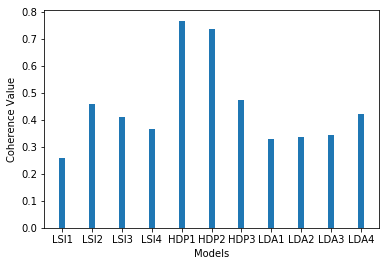

In [14]:
# compare coherence scores
evaluate_bar_graph([lsi_no_pooling_coherence, lsi_user_pooling_coherence, lsi_hashtag_pooling_coherence, lsi_optimized_coherence,
                    hdp_no_pooling_coherence, hdp_user_pooling_coherence, hdp_hashtag_pooling_coherence,
                    lda_no_pooling_coherence, lda_user_pooling_coherence, lda_hashtag_pooling_coherence, lda_optimized_coherence],
                   ['LSI1', 'LSI2', 'LSI3', 'LSI4', 'HDP1', 'HDP2',
                    'HDP3', 'LDA1', 'LDA2', 'LDA3', 'LDA4'])
plt.show()

#### The HDP models have the best coherence scores but the topics are way too granular on inspection. In fact, the LDA achieves similar coherence scores if the number of topics is increased. But to ensure human interpretability, the number of topics is restricted to a lower number. In addition, the HDP models are very unstable on retraining.

## Comparison of the LDA4 model and LSI2 model

In [16]:
# show topics of lsi Model
for i in range(5):
    print(lsi_model_user_pooling.show_topic(i))
    print()

[('#photodrinking', -0.56192910427723186), ('día', -0.38944963212563566), ('cada', -0.38897725124187921), ('nuestra', -0.38893745945000063), ('cervecita', -0.38887440063370932), ('drinking', -0.157239407725838), ('torrades', -0.093539298526845616), ('ross', -0.093539298526845616), ('cal', -0.090354560428144604), ('ipa', -0.06334025050669094)]

[('#streetart', 0.52248138340189387), ('#arteurbano', 0.50975104082455414), ('arte', 0.40341501547023412), ('tres', 0.27710930142280471), ('xemeneies', 0.27702256124014318), ('#graffiti', 0.27385468245409583), ('#arteenlacalle', 0.24209571205007249), ('#instagood', 0.057885762633160379), ('#artecallejero', 0.049194267161956698), ('el', 0.047295987007589614)]

[('sagrada', -0.74490135982944217), ('familia', -0.49753688624388498), ('basílica', -0.20236760038531504), ('família', -0.18031290078769271), ('#sagradafamilia', -0.13837958519997978), ('photo', -0.13191879242308269), ('posted', -0.13046549990390283), ('gothic', -0.10346716453182719), ('quar

In [17]:
# show topics of lda model
_ = lda_model_optimized.print_topics()

2018-09-26 02:10:05,657 : INFO : topic #0 (0.032): 0.011*"#workout" + 0.009*"#fit" + 0.008*"#fitness" + 0.008*"#selfie" + 0.007*"#yogaeverydamnday" + 0.007*"#fashion" + 0.006*"#sport" + 0.006*"#youtube" + 0.006*"#summer" + 0.005*"#photos"
2018-09-26 02:10:05,657 : INFO : topic #1 (0.051): 0.018*"#beach" + 0.017*"#weekend" + 0.017*"#summer" + 0.012*"#friends" + 0.011*"#love" + 0.010*"#sun" + 0.009*"#fun" + 0.008*"beach" + 0.008*"#españa" + 0.007*"#holiday"
2018-09-26 02:10:05,661 : INFO : topic #2 (0.034): 0.013*"#wanderlust" + 0.013*"#friends" + 0.011*"#travelblogger" + 0.010*"#love" + 0.008*"#gato" + 0.006*"#happy" + 0.006*"#fun" + 0.006*"#bethelona" + 0.006*"#travel" + 0.006*"love"
2018-09-26 02:10:05,665 : INFO : topic #3 (0.033): 0.039*"#streetart" + 0.033*"#graffiti" + 0.016*"#arteurbano" + 0.014*"#digerible" + 0.013*"#streetphotography" + 0.011*"#artecallejero" + 0.010*"#artederua" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#yogi"
2018-09-26 02:10:05,665 : INFO : topic #4 (0.047): 

#### Although the LSI model has a better coherence score, the topics of the lda model seem to make more sense. It also has some other advantages such as its probabilistic foundation. The lda model will thus be used to analyze the topic distribution over the districts.